In [1]:
#impoting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Loading data
df = pd.read_csv('Breast_cancer.csv')
df.drop('id',axis=1,inplace=True)
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Data Cleaning and Preprocessing**

In [3]:
#number of rows and columns
df.shape

(569, 32)

In [4]:
#number of empty values in each column
df.isna().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [5]:
#only one column is having empty value with all 569 rows
#drop such column with all(rows) missing values

df = df.dropna(axis=1)  #drops all of the columns with empty values. in our case only 1 column

In [6]:
df.shape

(569, 31)

In [7]:
df['diagnosis'].value_counts()   #357 patients with no cancer, 212 patients may have cancer

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='diagnosis'>

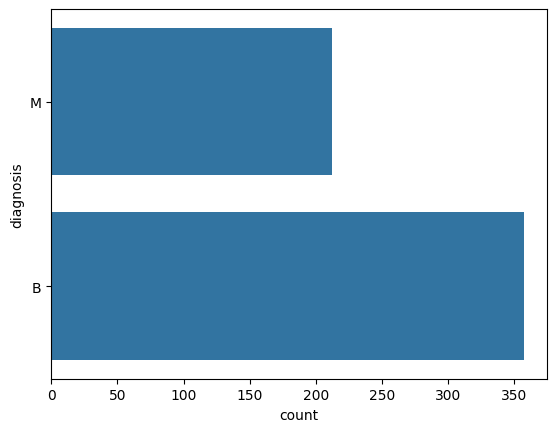

In [8]:
sns.countplot(df['diagnosis'], label = 'diagnosis')

In [9]:
#datatypes of columns
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

**we need to change the diagnosis data type into int.**

**convert M = maligant(cancer exists), B = benign(no cancer) into M = 1 and B = 0.**

In [10]:
from sklearn.preprocessing import LabelEncoder
#initializing the LabelEncoder class from sklearn
labelencoder_Y = LabelEncoder()

# Fit and transforming the second column (index 1).
# The LabelEncoder assigns 0 to 'B' and 1 to 'M' (based on lexicographical order)
labelencoder_Y.fit_transform(df['diagnosis'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [11]:
#modifying the second column with the changed data type.(change in dataframe)
df['diagnosis'] = labelencoder_Y.fit_transform(df['diagnosis'].values)

In [12]:
df.head(6)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [13]:
#correlations betwween each column
df.iloc[:,1:12].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111


<Axes: >

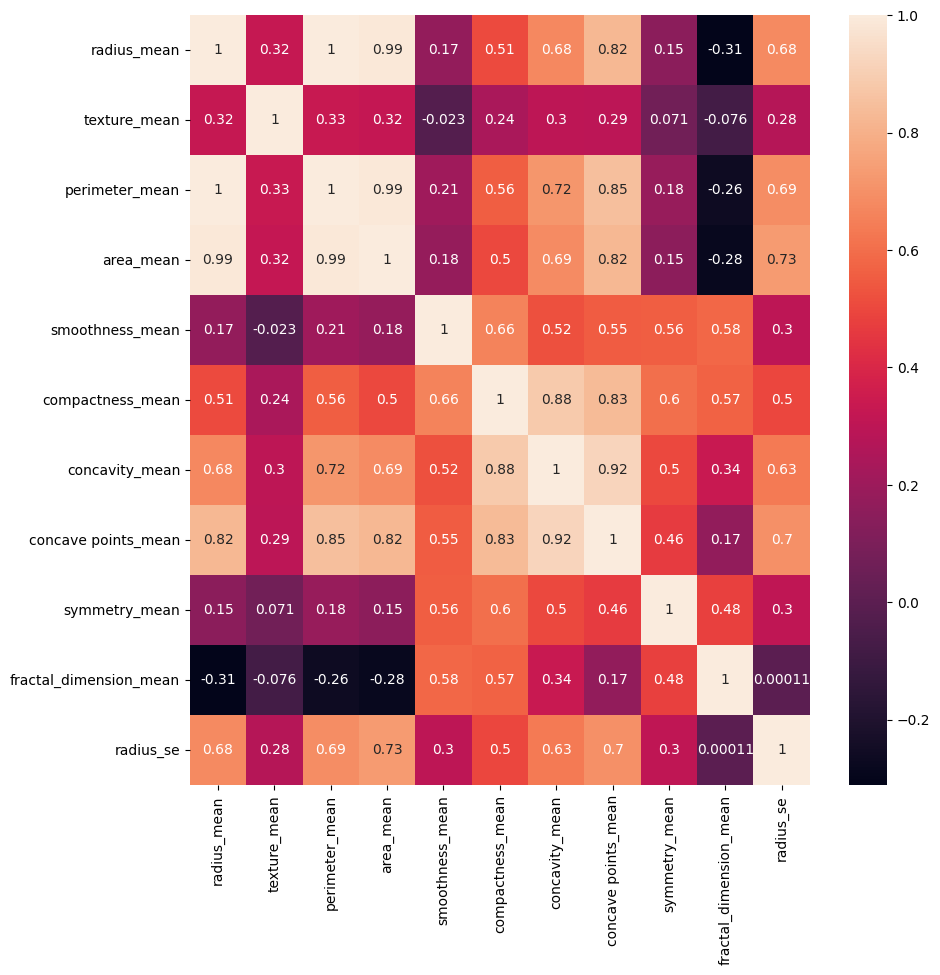

In [14]:
#visualizing Correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True)

**Spliting Data set into training(75%) and testing(25%) data sets**

In [15]:
#Split the data set into independent (X) and  dependent (Y) data sets
X = df.iloc[:,1:31].values   #excluding diagnosis column
Y = df.iloc[:,0].values    #only diagnosis column

In [38]:
#Split the dataset into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [40]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestClassifier()

In [41]:
model.score(X_test, Y_test)

0.965034965034965

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[85,  0],
       [ 5, 53]])

Text(95.72222222222221, 0.5, 'real')

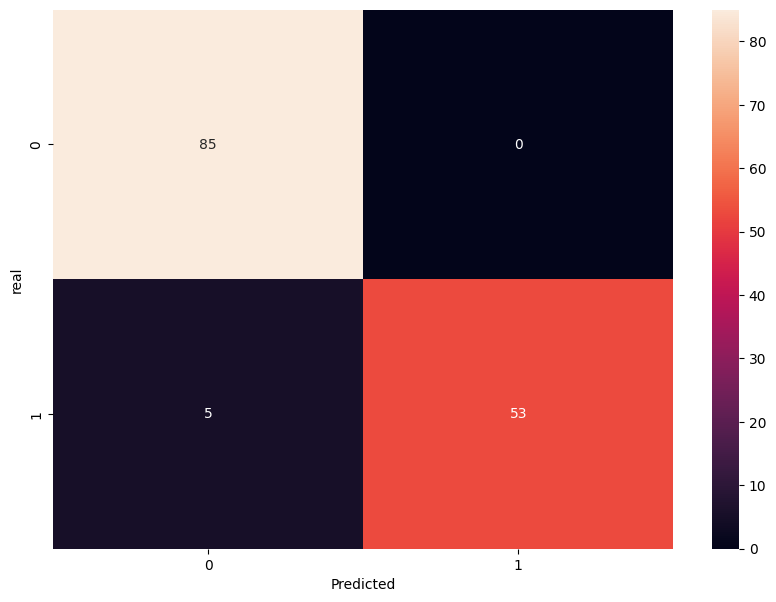

In [44]:
plt.figure(figsize =(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [45]:
score = accuracy_score(Y_test, y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(df))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(df)-corr, 'Incorrect detections')

Accuracy:  96.5 %,  549.1048951048951 correct detections
Inaccuracy:  3.5 %,  19.89510489510485 Incorrect detections


**Mapping Predicted integers Back to Labels**

In [46]:
int_to_label = { 0: 'B', 1: 'M'}
label_to_name = {'B': 'Benign', 'M': 'Maligant'}

**Predictive System**

In [47]:
df.loc[23]

diagnosis                     1.000000
radius_mean                  21.160000
texture_mean                 23.040000
perimeter_mean              137.200000
area_mean                  1404.000000
smoothness_mean               0.094280
compactness_mean              0.102200
concavity_mean                0.109700
concave points_mean           0.086320
symmetry_mean                 0.176900
fractal_dimension_mean        0.052780
radius_se                     0.691700
texture_se                    1.127000
perimeter_se                  4.303000
area_se                      93.990000
smoothness_se                 0.004728
compactness_se                0.012590
concavity_se                  0.017150
concave points_se             0.010380
symmetry_se                   0.010830
fractal_dimension_se          0.001987
radius_worst                 29.170000
texture_worst                35.590000
perimeter_worst             188.000000
area_worst                 2615.000000
smoothness_worst         

In [48]:
input_data = (
     21.160000,
     23.040000,
     137.200000,
     1404.000000,
     0.094280,
     0.102200,
     0.109700,
     0.086320,
     0.176900,
     0.052780,
     0.691700,
     1.127000,
     4.303000,
     93.990000,
     0.004728,
     0.012590,
     0.017150,
     0.010380,
     0.010830,
     0.001987,
     29.170000,
     35.590000,
     188.000000,
     2615.000000,
     0.140100,
     0.260000,
     0.315500,
     0.200900,
     0.282200,
     0.075260
)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

label = int_to_label[prediction[0]]
cancer_type = label_to_name[label]

if cancer_type == 'Benign':
  print("No breast cancer detected as the type is ", cancer_type)
else:
  print("Breast cancer detected as the type is ", cancer_type)

Breast cancer detected as the type is  Maligant


**Saving and Loading Model**

In [49]:
import pickle

In [50]:
filename = 'Breast_cancer_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [51]:
loaded_model = pickle.load(open(filename, 'rb'))